  # SMS_SPAM

#### Changer la repertoire du travail

In [1]:
import os
os.chdir("C:\\Users\\ysf\\Desktop")

In [2]:
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#### charger les données

In [3]:
import pandas as pd
my_data=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
 data=my_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] ,axis=1)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### chager le noms des columns

In [6]:
data = data.rename(columns={"v1":"class", "v2":"message"})
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['length'] = data['message'].apply(len)
data.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [ ]:
data.dtypes

In [ ]:
data.shape

#### construire les graphes

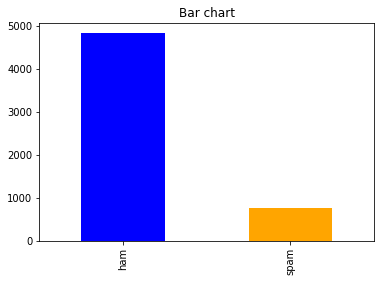

In [11]:
count_Class=pd.value_counts(data["class"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()


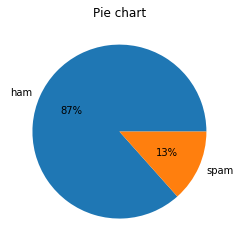

In [12]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
data = data.replace(['ham','spam'],[0, 1])
data.head()

## preprecessing

In [8]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [9]:
textFeatures = data['message'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, data['class'], test_size=0.3, random_state=111)

## methode1:SVM

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
Yhat1 = svc.predict(features_test)
accuracy_score(labels_test,Yhat1)

0.9778708133971292

## methode2:Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
Yhat2 = mnb.predict(features_test)
accuracy_score(labels_test,Yhat2)

0.9856459330143541

## methode3:Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
spam_model=LogisticRegression(solver='liblinear',penalty='l1')
spam_model.fit(features_train, labels_train)
pred=spam_model.predict(features_test)
accuracy_score(labels_test,pred)

0.9419856459330144

## FLASK


In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return "Hello world !"

if __name__ == "__main__":
    app.run()

In [ ]:
from flask import Flask, jsonify
from sklearn.externals import joblib
import pandas as pd
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    
     return jsonify({Yhat1})
if __name__ == '__main__':
     
     app.run()